<a href="https://colab.research.google.com/github/onurozansunger/FDS-PROJECT/blob/main/merged2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Read the datasets
netflix_data = pd.read_csv('netflix_titles.csv', delimiter=',', encoding='utf-8')
name_data = pd.read_csv('name_basics.tsv', delimiter='\t', encoding='utf-8')
title_data = pd.read_csv('title_basics.tsv', delimiter='\t', encoding='utf-8')
ratings_data = pd.read_csv('ratings_data.tsv', delimiter='\t', encoding='utf-8')

/tmp/ipykernel_20377/1607118639.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_data = pd.read_csv('title_basics.tsv', delimiter='\t', encoding='utf-8')


In [ ]:
# Continuation of reading datasets
principals_data = pd.read_csv('title.principals.tsv.gz', sep='\t',compression='gzip')

In [5]:
# Continuation of reading datasets
crew_data = pd.read_csv('title.crew.tsv.gz', sep='\t',compression='gzip')

In [4]:
principals_modified = principals_data[(principals_data["category"] == "actor") | (principals_data["category"] == "actress") | (principals_data["category"] == "director")]

In [4]:
# First, merge ratings_data and title_data
merged_1_2 = pd.merge(ratings_data, title_data, on='tconst', how='inner')

# Then merge the result with crew_data
merged_1_2_3 = pd.merge(merged_1_2, crew_data, on='tconst', how='left')

# Continue the process with principals_modified
merged_1_2_3_6 = pd.merge(merged_1_2_3, principals_modified, on='tconst', how='left')

# Then, merge with name_data
merged_dataset = pd.merge(merged_1_2_3_6, name_data, on='nconst', how='inner')

# Finally, merge the imdb datasets with the Netflix one
netflix2 = pd.merge(netflix_data, merged_dataset, left_on='title', right_on='primaryTitle', how='left')

In [ ]:
# Remove the NaN values from the dataset
netflix3=df = netflix2.dropna(subset=['averageRating'])

Feature Selection

In [5]:
# Checking if runtime data can be selected as a feature. First, we have to modify the data type accordingly. 
merged_1_2['runtimeMinutes'] = pd.to_numeric(merged_1_2['runtimeMinutes'], errors='coerce')

# Remove the NaN values from the dataset
merged_1_2 = merged_1_2[merged_1_2['runtimeMinutes'].notna()]

# Reset index
merged_1_2.reset_index(drop=True, inplace=True)

In [6]:
merged_1_2.info

<bound method DataFrame.info of            tconst  averageRating  numVotes  titleType  \
0       tt0000001            5.7      2011      short   
1       tt0000002            5.7       271      short   
2       tt0000003            6.5      1931      short   
3       tt0000004            5.4       179      short   
4       tt0000005            6.2      2702      short   
...           ...            ...       ...        ...   
980835  tt9916690            8.3         8  tvEpisode   
980836  tt9916730            7.6        11      movie   
980837  tt9916766            7.0        22  tvEpisode   
980838  tt9916840            8.8         6  tvEpisode   
980839  tt9916880            8.2         6  tvEpisode   

                          primaryTitle                   originalTitle  \
0                           Carmencita                      Carmencita   
1               Le clown et ses chiens          Le clown et ses chiens   
2                       Pauvre Pierrot                  Pauvr

In [7]:
correlation = merged_1_2['averageRating'].corr(merged_1_2['runtimeMinutes'])
print("Correlation coefficient:", correlation) 

Correlation coefficient: -0.08317765978195327


Since the correlation coefficient of the runtime data is very small (smaller than 0.5), we decided not to use it as a feature. 

In [8]:
# Checking if the number of votes data can be selected as a feature. 
correlation = merged_1_2['averageRating'].corr(merged_1_2['numVotes'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.01689553678504378


Since the correlation coefficient of the number of votes data is very small (smaller than 0.5), we decided not to use it as a feature.

In [11]:
netflix_merged_df = pd.merge(netflix_data, merged_1_2, left_on='title', right_on= 'primaryTitle', how='left')

In [12]:
netflix_merged_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,7.4,7125.0,movie,Dick Johnson Is Dead,Dick Johnson Is Dead,0,2020,\N,89.0,"Biography,Documentary,Drama"
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,8.0,22.0,tvEpisode,Blood & Water,Blood & Water,0,2014,\N,42.0,"Crime,Documentary"
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,7.3,528.0,tvEpisode,Blood & Water,Blood & Water,0,2014,\N,88.0,"Crime,Drama,Mystery"
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,7.1,14.0,tvEpisode,Blood & Water,Blood & Water,0,2018,\N,44.0,"Adventure,Documentary,Reality-TV"
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,6.7,3958.0,tvSeries,Blood & Water,Blood & Water,0,2020,\N,53.0,"Drama,Mystery"


In [ ]:
# Remove the unnecessary columns from our datasets.
netflix4 = netflix3.drop(columns=['listed_in', 'description','director', 'cast','duration', 'date_added','titleType','runtimeMinutes', 'tconst', 'titleType', 'primaryTitle',  'originalTitle', 'isAdult', 'startYear', 'endYear', 'writers', 'ordering', 'nconst', 'job', 'characters', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles'])
# Save the final dataset as a new file in order to ease further use by other team members.
netflix4.to_csv('netflix4.csv', index=False)

In [8]:
netflix = pd.read_csv('netflix41.csv')

In [9]:
# We wanted to use country and director information as features in our model. To check if these information are actually
# useful, we conducted the following tests.

# Count the number of movies per country
country_counts = netflix['country'].value_counts()

# Filter out countries with insufficient data points
threshold = 5 
valid_countries = country_counts[country_counts >= threshold].index.tolist()

# Perform ANOVA test for 'country' and 'averageRating' only for valid countries
filtered_data = [netflix[netflix['country'] == country]['averageRating'] for country in valid_countries]
f_stat, p_value = f_oneway(*filtered_data)

print("F-statistic for countries:", f_stat)
print("p-value:", p_value)

F-statistic for countries: 6.838726434406598
p-value: 0.0


In [10]:
# ANOVA for director names
# Count the number of names
names_counts = netflix['primaryName'].value_counts()

# Filter out names with insufficient data points
threshold = 5 
valid_names = names_counts[names_counts >= threshold].index.tolist()

# Perform ANOVA test for names and 'averageRating' only for valid names
filtered_data2 = [netflix[netflix['primaryName'] == name]['averageRating'] for name in valid_names]
f_stat2, p_value2 = f_oneway(*filtered_data2)

print("F-statistic for names:", f_stat2)
print("p-value:", p_value2)

F-statistic for names: 4.091473904770355
p-value: 0.0


In [11]:
# Removing unnecessary columns and NaN values
netflix.drop([ 'directors', 'title', 'rating', 'show_id', 'release_year'], axis=1, inplace=True)
netflix4 = netflix.dropna()

In [12]:
netflix4.head()

,type,country,averageRating,numVotes,genres,category,primaryName
0,Movie,United States,7.4,7119.0,"Biography,Documentary,Drama",actor,Michael Hilow
1,Movie,United States,7.4,7119.0,"Biography,Documentary,Drama",actress,Ana Hoffman
2,TV Show,South Africa,8.0,22.0,"Crime,Documentary",actress,Susan Sarandon
3,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
4,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",actor,Neill Rea


In [13]:
# We decided only to use director information from the names column since encoding all the names resulted in exceeding capacity (i.e: dead kernel)
netflix5=netflix4[netflix4['category']=='director']

In [14]:
netflix5.head()

,type,country,averageRating,numVotes,genres,category,primaryName
3,TV Show,South Africa,7.3,528.0,"Crime,Drama,Mystery",director,Mike Smith
7,TV Show,South Africa,8.0,22.0,"Crime,Documentary",director,Steve Rivo
71,Movie,"United States,Ghana,Burkina Faso,United Kingdo...",7.0,784.0,Drama,director,Haile Gerima
84,Movie,"United States,Ghana,Burkina Faso,United Kingdo...",8.4,7.0,"Documentary,Short",director,Princess Garrett
88,Movie,United States,6.4,14869.0,"Comedy,Drama",director,Theodore Melfi


In [15]:
netflix5.columns

Index(['type', 'country', 'averageRating', 'numVotes', 'genres', 'category',
       'primaryName'],
      dtype='object')

# One Hot Encoding 

In [16]:
warnings.filterwarnings('ignore')

# Split string values into lists for 'genres', 'primaryName', and 'country' and convert 'type' column to binary values (1 for movies)
netflix5['genres'] = netflix5['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['primaryName'] = netflix5['primaryName'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['country'] = netflix5['country'].apply(lambda x: x.split(',') if isinstance(x, str) else [])
netflix5['type'] = netflix5['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# For 'rating', 'genres', 'country', 'primaryName', get unique values and apply one-hot encoding
all_genres = sum(netflix5['genres'], [])
unique_genres = set(all_genres)
for genre in unique_genres:
    netflix5['Genre_' + genre] = netflix5['genres'].apply(lambda x: 1 if genre in x else 0)

all_names = sum(netflix5['primaryName'], [])
unique_names = set(all_names)
for name in unique_names:
    netflix5['Name_' + name] = netflix5['primaryName'].apply(lambda x: 1 if name in x else 0)

# For 'country', get unique values and apply one-hot encoding
all_countries = sum(netflix5['country'], [])
unique_countries = set(all_countries)
for country in unique_countries:
    netflix5['Country_' + country] = netflix5['country'].apply(lambda x: 1 if country in x else 0)

# Remove the original categorical columns
netflix5.drop(['genres', 'primaryName', 'country'], axis=1, inplace=True)

print(netflix5.head())


    type  averageRating  numVotes  category  Genre_Sci-Fi  Genre_Short  \
3      0            7.3     528.0  director             0            0   
7      0            8.0      22.0  director             0            0   
71     1            7.0     784.0  director             0            0   
84     1            8.4       7.0  director             0            1   
88     1            6.4   14869.0  director             0            0   

    Genre_Film-Noir  Genre_Music  Genre_Horror  Genre_Reality-TV  ...  \
3                 0            0             0                 0  ...   
7                 0            0             0                 0  ...   
71                0            0             0                 0  ...   
84                0            0             0                 0  ...   
88                0            0             0                 0  ...   

    Country_Netherlands  Country_Russia  Country_Portugal  Country_Armenia  \
3                     0               

In [17]:
# Inspection on 'counry'
country_columns = [col for col in netflix5.columns if col.startswith('Country_')]
print(country_columns)

['Country_', 'Country_Morocco', 'Country_Nepal', 'Country_West Germany', 'Country_Taiwan', 'Country_Denmark', 'Country_Vatican City', 'Country_Senegal', 'Country_India', 'Country_Afghanistan', 'Country_Sweden', 'Country_Jamaica', 'Country_Albania', 'Country_Paraguay', 'Country_Nigeria', 'Country_Angola', 'Country_Bulgaria', 'Country_Cambodia', 'Country_Jordan', 'Country_Brazil', 'Country_Guatemala', 'Country_Pakistan', 'Country_Lebanon', 'Country_Sri Lanka', 'Country_Singapore', 'Country_Israel', 'Country_Cayman Islands', 'Country_Bangladesh', 'Country_Cameroon', 'Country_Italy', 'Country_Hong Kong', 'Country_Bermuda', 'Country_Norway', 'Country_Colombia', 'Country_Mongolia', 'Country_Romania', 'Country_Iraq', 'Country_Latvia', 'Country_Czech Republic', 'Country_Argentina', 'Country_Azerbaijan', 'Country_Sudan', 'Country_Namibia', 'Country_Germany', 'Country_Ecuador', 'Country_Bahamas', 'Country_Mexico', 'Country_Japan', 'Country_Thailand', 'Country_Lithuania', 'Country_Qatar', 'Countr

In [18]:
# Inspection on 'counry' - continuation
num_country_columns = sum(col.startswith('Country_') for col in netflix5.columns)
print("Toplam Country sütunu sayısı:", num_country_columns)

Toplam Country sütunu sayısı: 116


In [19]:
netflix5.drop(['category', 'Country_'], axis=1, inplace=True)

In [20]:
netflix5.head()

,type,averageRating,numVotes,Genre_Sci-Fi,Genre_Short,Genre_Film-Noir,Genre_Music,Genre_Horror,Genre_Reality-TV,Genre_Drama,...,Country_Netherlands,Country_Russia,Country_Portugal,Country_Armenia,Country_Burkina Faso,Country_Samoa,Country_Spain,Country_China,Country_Algeria,Country_Kenya
3,0,7.3,528.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,7.0,784.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
84,1,8.4,7.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
88,1,6.4,14869.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Removing Outliers

<Axes: xlabel='numVotes'>

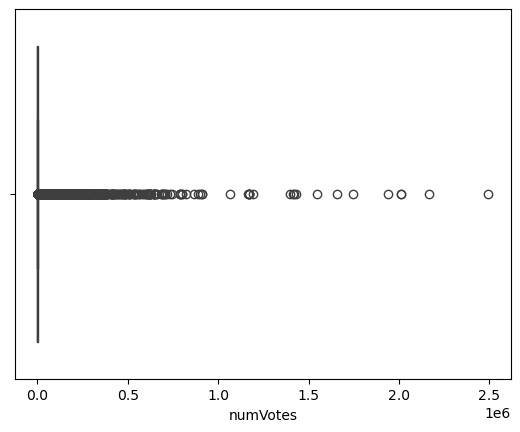

In [21]:
# After encoding, we removed outliers from the number of votes and average rating columns
numvotes_df=netflix5["numVotes"]
# Plot before removing outliers
sns.boxplot(x=numvotes_df)

In [22]:
y_rating = netflix5['numVotes']

# Calculating IQR 
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1

# Removing Outliers according to IQR
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))
netflix5_clean = netflix5[not_outlier]

<Axes: xlabel='numVotes'>

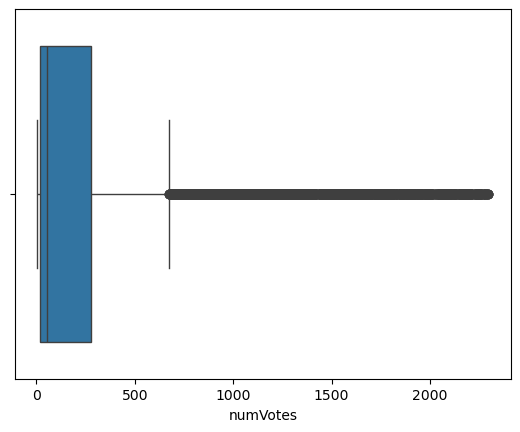

In [23]:
numvotes_df=netflix5_clean["numVotes"]
# Plot of removing outliers
sns.boxplot(x=numvotes_df)

In [24]:
netflix5_clean.drop(['numVotes'], axis=1, inplace=True)
netflix5_clean.head()

,type,averageRating,Genre_Sci-Fi,Genre_Short,Genre_Film-Noir,Genre_Music,Genre_Horror,Genre_Reality-TV,Genre_Drama,Genre_War,...,Country_Netherlands,Country_Russia,Country_Portugal,Country_Armenia,Country_Burkina Faso,Country_Samoa,Country_Spain,Country_China,Country_Algeria,Country_Kenya
3,0,7.3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,7.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
84,1,8.4,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100,1,5.5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Removing outliers from 'averageRating'
y_rating = netflix5_clean['averageRating']

# Calculating IQR
Q1 = y_rating.quantile(0.25)
Q3 = y_rating.quantile(0.75)
IQR = Q3 - Q1
# Removing Outliers according to IQR
not_outlier = (y_rating >= (Q1 - 1.5 * IQR)) & (y_rating <= (Q3 + 1.5 * IQR))
netflix6_clean = netflix5_clean[not_outlier]

In [26]:
netflix6_clean.head()

,type,averageRating,Genre_Sci-Fi,Genre_Short,Genre_Film-Noir,Genre_Music,Genre_Horror,Genre_Reality-TV,Genre_Drama,Genre_War,...,Country_Netherlands,Country_Russia,Country_Portugal,Country_Armenia,Country_Burkina Faso,Country_Samoa,Country_Spain,Country_China,Country_Algeria,Country_Kenya
3,0,7.3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,8.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,1,7.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
84,1,8.4,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
100,1,5.5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
netflix6_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18390 entries, 3 to 137970
Columns: 15616 entries, type to Country_Kenya
dtypes: float64(1), int64(15615)
memory usage: 2.1 GB


In [28]:
# Removing NaN values
df_cleaned = netflix6_clean.dropna()

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18390 entries, 3 to 137970
Columns: 15616 entries, type to Country_Kenya
dtypes: float64(1), int64(15615)
memory usage: 2.1 GB


In [ ]:
X = df_cleaned.drop(['averageRating'], axis=1) 
y_rating = df_cleaned['averageRating']

# Separating training and test sets for the models
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# Models

Model 1: Cross Validation Random Forest

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Seperate features and target 
X = df_cleaned.drop(['averageRating'], axis=1)  
y_rating = df_cleaned['averageRating']

# Separate training and test sets for the models
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# Construct Random Forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, y_rating_train)

# Evaluate the performance of the model
y_pred_rating_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_rating_test, y_pred_rating_rf)
scores_rf = cross_val_score(model_rf, X_train, y_rating_train, cv=5)

print(f'Random Forest Modelin Test MSE\'si: {mse_rf}')
print(f'Random Forest Çapraz Doğrulama Skorları: {scores_rf}')
print(f'Ortalama Random Forest Skoru: {scores_rf.mean()}')


Random Forest Modelin Test MSE'si: 1.2431124625770338
Random Forest Çapraz Doğrulama Skorları: [0.09142213 0.1004794  0.12390585 0.12070018 0.08216121]
Ortalama Random Forest Skoru: 0.10373375190532783


Feature Selenction and Cross Validation Random Forest

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Seperate features and target 
X = df_cleaned.drop(['averageRating'], axis=1)  # 'numVotes' sütunu zaten çıkarıldı
y_rating = df_cleaned['averageRating']

# Separate training and test sets for the models
X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.2, random_state=0)

# Train the first Random Forest model to get important features
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_rating_train)
feature_importances = rf.feature_importances_

# Remove the less important features
threshold = 0.01  
less_important_features = [feature for feature, importance in zip(X.columns, feature_importances) if importance < threshold]
X_selected_features = X.drop(less_important_features, axis=1)

# Separate training and test sets again with the selected features
X_train_selected, X_test_selected, y_rating_train, y_rating_test = train_test_split(
    X_selected_features, y_rating, test_size=0.2, random_state=0)

# Train the new Random Forest model with the selected features
model_rf_selected = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf_selected.fit(X_train_selected, y_rating_train)

# Evaluate the performance of the model
y_pred_rating_rf_selected = model_rf_selected.predict(X_test_selected)
mse_rf_selected = mean_squared_error(y_rating_test, y_pred_rating_rf_selected)
scores_rf_selected = cross_val_score(model_rf_selected, X_train_selected, y_rating_train, cv=5)

print(f'Seçilmiş Özelliklerle Random Forest Modelin Test MSE\'si: {mse_rf_selected}')
print(f'Seçilmiş Özelliklerle Random Forest Çapraz Doğrulama Skorları: {scores_rf_selected}')
print(f'Ortalama Seçilmiş Özelliklerle Random Forest Skoru: {scores_rf_selected.mean()}')


Seçilmiş Özelliklerle Random Forest Modelin Test MSE'si: 1.3216644911637356
Seçilmiş Özelliklerle Random Forest Çapraz Doğrulama Skorları: [0.04761543 0.03974076 0.05264678 0.05016132 0.04705633]
Ortalama Seçilmiş Özelliklerle Random Forest Skoru: 0.047444125942571656


Cross Validation Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Construct the Ridge Regression model
model_ridge = Ridge(alpha=1.0) 

# Train the model
model_ridge.fit(X_train, y_rating_train)

# Evaluate the performance of the model
y_pred_rating_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_rating_test, y_pred_rating_ridge)
scores_ridge = cross_val_score(model_ridge, X_train, y_rating_train, cv=5)

print(f'Ridge Modelin Test MSE\'si: {mse_ridge}')
print(f'Ridge Çapraz Doğrulama Skorları: {scores_ridge}')
print(f'Ortalama Ridge Skoru: {scores_ridge.mean()}')

Ridge Modelin Test MSE'si: 1.1427768548733688
Ridge Çapraz Doğrulama Skorları: [0.14192365 0.13958994 0.16713121 0.16907209 0.161632  ]
Ortalama Ridge Skoru: 0.15586977619828035


XGBOOST (Extreme Gradient Boosting)

In [31]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df=df_cleaned

# Seperate features and target 
target = df['averageRating']
features = df.drop('averageRating', axis=1)

# Separate training and test sets for the models
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Construct and train the first model
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

# Get the most important features
feature_importances = model.feature_importances_
threshold = np.sort(feature_importances)[-10] 
important_features = [feature for feature, importance in zip(features.columns, feature_importances) if importance >= threshold]

# Construct a new model and train it with the selected features
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

model_important = xgb.XGBRegressor(objective ='reg:squarederror')
model_important.fit(X_train_important, y_train)

# Evaluate the performance of the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Performance:")
    print("------------------")
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(np.sqrt(mse)))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

evaluate_model(model_important, X_test_important, y_test)


Model Performance:
------------------
Mean Squared Error (MSE): 1.3283
Root Mean Squared Error (RMSE): 1.1525
Mean Absolute Error (MAE): 0.9193
R-squared (R2): 0.0465


Lineer Regression

In [32]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = df_cleaned

# Seperate features and target 
target = df['averageRating']
features = df.drop('averageRating', axis=1)

# Separate training and test sets for the models
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Construct and train the model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model.fit(X_train, y_train)

# Evaluate the performance of the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Model Performance:")
    print("------------------")
    print("Mean Squared Error (MSE): {:.4f}".format(mse))
    print("Root Mean Squared Error (RMSE): {:.4f}".format(np.sqrt(mse)))
    print("Mean Absolute Error (MAE): {:.4f}".format(mae))
    print("R-squared (R2): {:.4f}".format(r2))

evaluate_model(model, X_test, y_test)


Model Performance:
------------------
Mean Squared Error (MSE): 1.3479
Root Mean Squared Error (RMSE): 1.1610
Mean Absolute Error (MAE): 0.9331
R-squared (R2): 0.0324
